# Brazilian E-Commerce Public Dataset by Olist

This is a Brazilian ecommerce public dataset of orders made at Olist Store. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers.

## Choosing a domain
The domain is e-commerce.

## Describing our hypotheses and data sets
The dataset is composed of 6 tables (csv files): customers dataset, order items dataset, order payments dataset, orders dataset, products dataset, and product category names. They include different types of data, such as time series data, geographical data, and derived data.
Our hypothesis is related to customer segmentation: analyse customer demographics, such as city, to segment the customer database to identify top performing cities. This analysis can improve customer targeting.

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

customers = pd.read_csv('olist_customers_dataset.csv')
items = pd.read_csv('olist_order_items_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
names = pd.read_csv('product_category_name_translation.csv')

In [2]:
customers[['customer_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']].shape

(99441, 4)

In [3]:
items[['order_id', 'product_id', 'price']].shape

(112650, 3)

In [4]:
payments[['order_id', 'payment_type']].shape

(103886, 2)

In [5]:
orders[['order_id','customer_id','order_purchase_timestamp']].shape

(99441, 3)

In [6]:
products[['product_id', 'product_category_name']].shape

(32951, 2)

In [7]:
names.shape

(71, 2)

## Joining the datasets

In [8]:
product_names = pd.DataFrame()
product_names = pd.merge(products[['product_id', 'product_category_name']],names, on="product_category_name")
items_and_names = pd.DataFrame()
items_and_names = pd.merge(items[['order_id', 'product_id', 'price']],product_names[['product_id', 'product_category_name_english']], on="product_id")
items_names_payments = pd.DataFrame()
items_names_payments = pd.merge(items_and_names,payments[['order_id', 'payment_type']], on="order_id")
items_names_payments_orders = pd.DataFrame()
items_names_payments_orders = pd.merge(items_names_payments,orders[['order_id','customer_id','order_purchase_timestamp']], on="order_id")
all = pd.DataFrame()
all = pd.merge(items_names_payments_orders,customers[['customer_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']], on="customer_id")
all.head()

order_id                        product_id  price  \
0  00010242fe8c5a6d1ba2dd792cb16214  4244733e06e7ecb4970a6e2683c13e61   58.9   
1  130898c0987d1801452a8ed92a670612  4244733e06e7ecb4970a6e2683c13e61   55.9   
2  532ed5e14e24ae1f0d735b91524b98b9  4244733e06e7ecb4970a6e2683c13e61   64.9   
3  6f8c31653edb8c83e1a739408b5ff750  4244733e06e7ecb4970a6e2683c13e61   58.9   
4  7d19f4ef4d04461989632411b7e588b9  4244733e06e7ecb4970a6e2683c13e61   58.9   

  product_category_name_english payment_type  \
0                    cool_stuff  credit_card   
1                    cool_stuff       boleto   
2                    cool_stuff  credit_card   
3                    cool_stuff  credit_card   
4                    cool_stuff  credit_card   

                        customer_id order_purchase_timestamp  \
0  3ce436f183e68e07877b285a838db11a      2017-09-13 08:59:02   
1  e6eecc5a77de221464d1c4eaff0a9b64      2017-06-28 11:52:20   
2  4ef55bf80f711b372afebcb7c715344a      2018-05-18 10:25:53   
3  30407a72ad8b3f4df4d15369126b20c9      2017-08-01 18:38:42   
4  91a792fef70ecd8cc69d3c7feb3d12da      2017-08-10 21:48:40   

   customer_zip_code_prefix          customer_city customer_state  
0                     28013  campos dos goytacazes             RJ  
1                     75800                  jatai             GO  
2                     30720         belo horizonte             MG  
3                     83070   sao jose dos pinhais             PR  
4                     36400   conselheiro lafaiete             MG

## Cleaning and preparing the data
## Removing duplicates

In [9]:
all.shape

(115878, 10)

In [10]:
len(all['order_id'].unique())

97255

In [11]:
all = all.drop_duplicates(subset='order_id',keep='first')

In [12]:
all.shape

(97255, 10)

In [13]:
type(all['order_purchase_timestamp'][1])

str

In [14]:
all['order_purchase_timestamp']= pd.to_datetime(all['order_purchase_timestamp'])

## Exporting to csv

In [15]:
all.to_excel('merged.xlsx', sheet_name='Sheet1')
all.to_csv('merged.csv')

In [16]:
# Calling describe shows that there are no values to clean. Price looks normally distributed, there are no outliers.
all.describe()

price  customer_zip_code_prefix
count  97255.000000              97255.000000
mean     125.983444              35146.411999
std      190.927477              29787.788224
min        0.850000               1003.000000
25%       41.900000              11380.000000
50%       79.000000              24425.000000
75%      139.900000              58862.500000
max     6735.000000              99980.000000

## Exploring the data

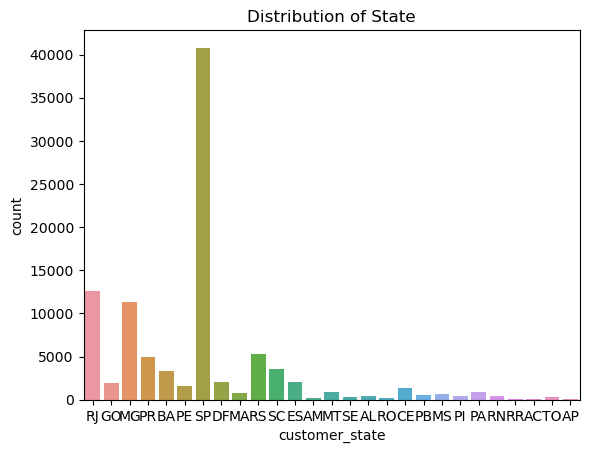

In [17]:
# See the distribution of customer state to recognise different distributions
sns.countplot(x='customer_state', data=all);
plt.title('Distribution of State');

Text(0.5, 0, 'Time of purchase')

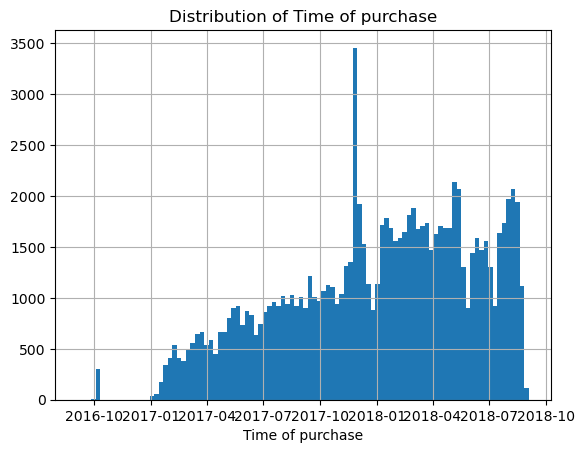

In [18]:
# Create a histogram of times of purchases
all.hist('order_purchase_timestamp', bins=100)
plt.title('Distribution of Time of purchase')
plt.xlabel('Time of purchase')

Text(0.5, 0, 'Price')

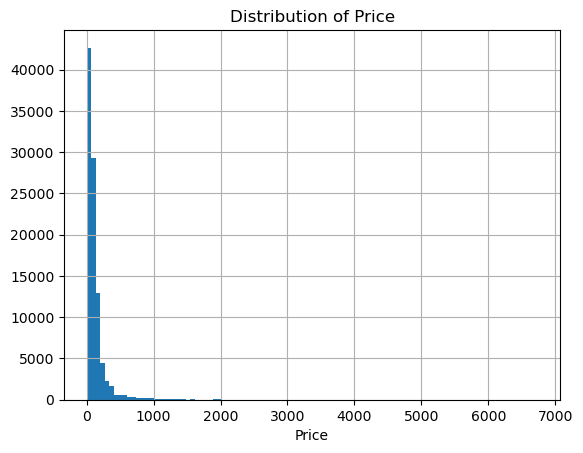

In [19]:
# Create a histogram of prices
all.hist('price', bins=100)
plt.title('Distribution of Price')
plt.xlabel('Price')

Text(0.5, 0, 'Zip code')

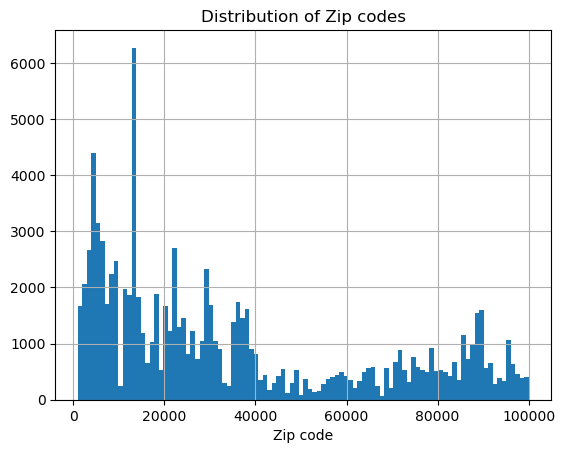

In [20]:
# Create a histogram of zip codes
all.hist('customer_zip_code_prefix', bins=100)
plt.title('Distribution of Zip codes')
plt.xlabel('Zip code')

Text(0.5, 1.0, 'Scatter Plot correlating Zip code to Price')

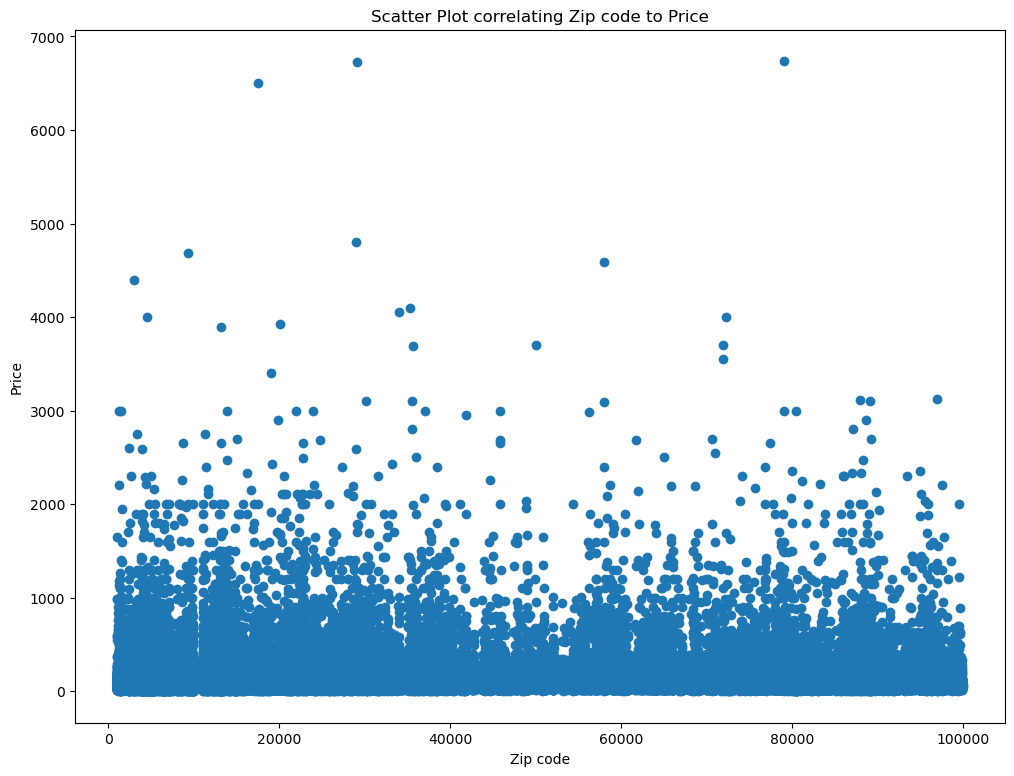

In [24]:
plt.figure(figsize=(12,9))
plt.scatter(all['customer_zip_code_prefix'],all['price'])
plt.xlabel('Zip code')
plt.ylabel('Price')
plt.title('Scatter Plot correlating Zip code to Price')

## Creating the narrative of our story
- Background, context
- Sources of data
- Hypotheses
- How are we going to support our hypotheses?

## Deciding on the types of charts, color schemes, univariate, multivariate data you are going to present

In [21]:
all

order_id                        product_id  \
0       00010242fe8c5a6d1ba2dd792cb16214  4244733e06e7ecb4970a6e2683c13e61   
1       130898c0987d1801452a8ed92a670612  4244733e06e7ecb4970a6e2683c13e61   
2       532ed5e14e24ae1f0d735b91524b98b9  4244733e06e7ecb4970a6e2683c13e61   
3       6f8c31653edb8c83e1a739408b5ff750  4244733e06e7ecb4970a6e2683c13e61   
4       7d19f4ef4d04461989632411b7e588b9  4244733e06e7ecb4970a6e2683c13e61   
...                                  ...                               ...   
115873  ffebd80e3291e811c308365936897efd  4cc4d02efc8f249c13355147fb44e34d   
115874  ffee31fb4b5e35c9123608015637c495  b10ecf8e33aaaea419a9fa860ea80fb5   
115875  fff7c4452f050315db1b3f24d9df5fcd  dd469c03ad67e201bc2179ef077dcd48   
115876  fffa82886406ccf10c7b4e35c4ff2788  bbe7651fef80287a816ead73f065fc4b   
115877  fffe41c64501cc87c801fd61db3f6244  350688d9dc1e75ff97be326363655e01   

        price product_category_name_english payment_type  \
0        58.9                    cool_stuff  credit_card   
1        55.9                    cool_stuff       boleto   
2        64.9                    cool_stuff  credit_card   
3        58.9                    cool_stuff  credit_card   
4        58.9                    cool_stuff  credit_card   
...       ...                           ...          ...   
115873  129.9                  garden_tools  credit_card   
115874   99.0               furniture_decor  credit_card   
115875  736.0                 watches_gifts  credit_card   
115876  229.9                sports_leisure  credit_card   
115877   43.0                bed_bath_table  credit_card   

                             customer_id order_purchase_timestamp  \
0       3ce436f183e68e07877b285a838db11a      2017-09-13 08:59:02   
1       e6eecc5a77de221464d1c4eaff0a9b64      2017-06-28 11:52:20   
2       4ef55bf80f711b372afebcb7c715344a      2018-05-18 10:25:53   
3       30407a72ad8b3f4df4d15369126b20c9      2017-08-01 18:38:42   
4       91a792fef70ecd8cc69d3c7feb3d12da      2017-08-10 21:48:40   
...                                  ...                      ...   
115873  050309b91cc5e04e68841938e7984aaf      2018-07-13 20:04:05   
115874  11e0f43ab4e2d2c48348dd9332c0ef80      2018-08-18 10:00:59   
115875  dec8952e97ef6124259c56914fb3569c      2017-06-01 16:53:03   
115876  a5201e1a6d71a8d21e869151bd5b4085      2017-12-18 16:33:07   
115877  96d649da0cc4ff33bb408b199d4c7dcf      2018-06-09 17:00:18   

        customer_zip_code_prefix          customer_city customer_state  
0                          28013  campos dos goytacazes             RJ  
1                          75800                  jatai             GO  
2                          30720         belo horizonte             MG  
3                          83070   sao jose dos pinhais             PR  
4                          36400   conselheiro lafaiete             MG  
...                          ...                    ...            ...  
115873                     28740    conceicao de macabu             RJ  
115874                     83065   sao jose dos pinhais             PR  
115875                     27261          volta redonda             RJ  
115876                     59955        tenente ananias             RN  
115877                     18605               botucatu             SP  

[97255 rows x 10 columns]

In [22]:
len(all['customer_city'].unique())

4095

### We still need to derive some data - use some features like group by, pivot, melt and also some simple statistics such as mean, std, or even your own had written ones, to derive some new values such as moving averages, correlations etc.

### We still need to clean and prepare the data (replace NaN, generate new data, use Imputers, etc.) - do normalisation/standardisation and/or quality control???